# Feature Engineering - Handling Missing Values

* Missing values are typically coded in data with a null or as an empty cell, although many more representations can exist is data.
* Sometimes missing values are even coded with a value that looks like a legitimate value.
* Some missing values are simple data entry errors.
* Some mean nothing more than the fact the values are completely unknown.
* Some might have been deliberately not collected during data collection

### MCAR, MAR and MNAR

#### MCAR - Missing Completely At Random
* There is no way to determine what the value should have been.

#### MAR - Missing At Random
* A conditional relationship exists between the missing values and the other variables
* The value might be missing because of the another observed value.
* E.g., if answering "Yes" to Question 10 means one doesn't answer Question 11, the reason Question 11 is missing not random, but we cannot determine what would have been the value either.

#### MNAR - Missing Not At Random
* The values of the missing value can be inferred from in general by the mere fact that the value is missing.
* E.g., a responder in a survey may not provide information about a criminal recordif they have one, whereas those without a criminal record would report "No Record".
* It should not be imputed with constants or at random

### Ways to Handle Missing Data

* Mean/Median/Mode Imputation
* Random Sample Imputation
* Capturing NaN with a New Feature
* End of Distribution Imputation
* Arbitrary Imputation
* Frequent Categories Imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Titanic/train.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

* Age, Cabin and Embarked are the columns which have the missing values in them

In [12]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Check on the % of missing values

In [13]:
df = pd.read_csv('Titanic/train.csv', usecols = ['Survived','Age','Fare'])

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#### Mean/Median/Mode Imputation

* The Mean/Median/Mode value is imputed into the missing vlaues

In [15]:
df['Age_median'] = df['Age'].fillna(df['Age'].median())

In [16]:
df.head(10)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


#### Random Sampling Imputation - Comparison with Mean/Median/Mode Imputation

* A random sample from the existing values is used to fill the missing values

In [43]:
df = pd.read_csv('Titanic/train.csv', usecols = ['Survived','Age','Fare'])

In [40]:
df['Age'].dropna().sample(df['Age'].isna().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
       ...  
396    31.00
452    30.00
395    22.00
882    22.00
821    27.00
314    43.00
622    20.00
204    18.00
60     22.00
731    11.00
81     29.00
676    24.50
433    17.00
378    20.00
174    56.00
624    21.00
642     2.00
157    30.00
427    19.00
698    49.00
179    36.00
24      8.00
630    80.00
458    50.00
49     18.00
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [44]:
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [46]:
random_sample = df['Age'].dropna().sample(df['Age'].isna().sum(), random_state=0)
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [53]:
def impute_nan(data,variable):
    df[variable+"_median"] = df[variable].fillna(df[variable].median())
    df[variable+"_random"] = df[variable]
    
    random_sample = df['Age'].dropna().sample(df['Age'].isna().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isna(),variable+"_random"]=random_sample

In [54]:
impute_nan(df,'Age')
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


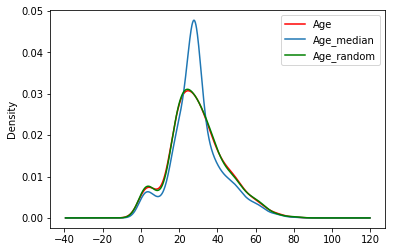

In [65]:
df['Age'].plot(kind='kde',color = 'red')
df['Age_median'].plot(kind='kde')
df['Age_random'].plot(kind='kde', color = 'green')
plt.legend()
plt.show()

#### The Mean/Median/Mode Imputation method
* Advantage: Easy to use
* Disadvantage: Modies the original distribution - observe the spike at mean as more records are now present near to it

#### Random Sampling Imputation method
* Advantage: Easy to use and causes less modification to the original distribution
* Disadvantage: May not work for all cases

In this case, the Random Sampling Imputation method keeps the original distribution intact and hence, preferrably will be used over Mean/Median/Mode Imputation

#### Capturing NaN with a New Feature

* In this method, we create a new feature related to the feature under discussion, such that if there is a missing value we can put it as 1 else 0 and vice-versa.

In [66]:
df = pd.read_csv('Titanic/train.csv', usecols = ['Survived','Age','Fare'])

In [67]:
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


Advantages
* This methods retains the significance of the feature under discussion and hence can be used to build our model.
* We can further combine it with any of the above 2 methods to impute missing values in the Age column while retaining the Age_nan column

Disadvantage
* Curse of dimensionality


#### End of Distribution Imputation
* It uses the data present after the 3rd standard deviation to impute into the missing values

In [68]:
df = pd.read_csv('Titanic/train.csv', usecols = ['Survived','Age','Fare'])

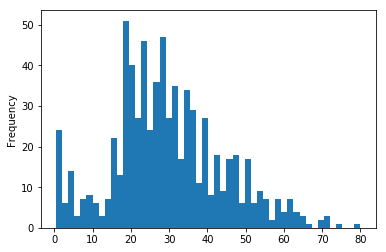

In [73]:
df['Age'].plot(kind = 'hist', bins=50)
plt.show()

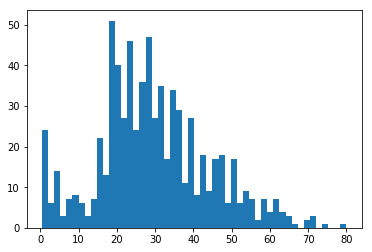

In [75]:
plt.hist(df['Age'], bins=50)
plt.show()

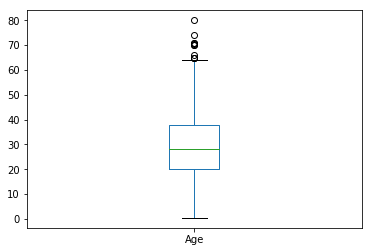

In [86]:
df['Age'].plot(kind='box')
plt.show()

In [88]:
3*df['Age'].std()

43.57949199700213

In [91]:
Age_eod = df['Age'].mean()+3*df['Age'].std()
Age_eod

73.27860964406095

In [92]:
df['Age_eod'] = df['Age'].fillna(Age_eod)

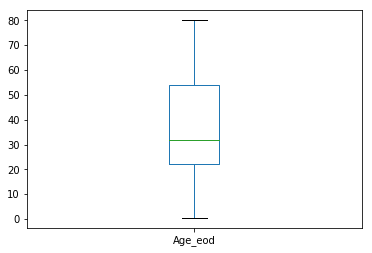

In [93]:
df['Age_eod'].plot(kind='box')
plt.show()

* We can see that there are no more outliers in this case

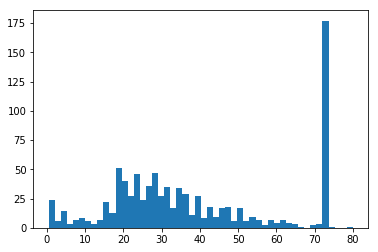

In [94]:
plt.hist(df['Age_eod'], bins=50)
plt.show()

* We see now there are a lot of records accumulated towards the End of the Distribution compared to Mean/Median/Mode where the accumulation takes place near the center.

In [95]:
df = pd.read_csv('Titanic/train.csv', usecols = ['Survived','Age','Fare'])

In [102]:
# using a function

def impute_nan_eod(data,variable):
    eod = df[variable].mean()+3*df[variable].std()
    df[variable+"_eod"] = df[variable].fillna(eod).astype('int32')

In [103]:
impute_nan_eod(df,'Age')
df.head(10)

,Survived,Age,Fare,Age_eod
0,0,22.0,7.2500,22
1,1,38.0,71.2833,38
2,1,26.0,7.9250,26
3,1,35.0,53.1000,35
4,0,35.0,8.0500,35
5,0,NaN,8.4583,73
6,0,54.0,51.8625,54
7,0,2.0,21.0750,2
8,1,27.0,11.1333,27
9,1,14.0,30.0708,14


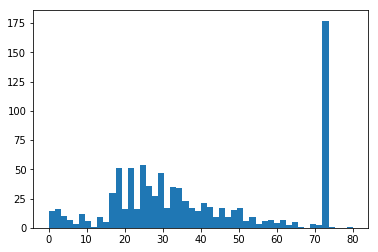

In [104]:
plt.hist(df['Age_eod'], bins=50)
plt.show()

#### Arbitrary Imputation
* In this case the missing values are replaced with an arbitrary value of your own choice.
* This may not work well with many of the datasets.

#### Frequent Categories Imputation
* This is equivalent to Mode Imputation
* Often used with Categorical features
* Can lead to problems if the % of missing values in high in a feature